Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

Loading the Data

In [2]:
mat = loadmat('ex7/ex7data1.mat')

In [3]:
X = mat['X']

Plotting the Input Data

Text(0.5, 1.0, 'Example Dataset 1')

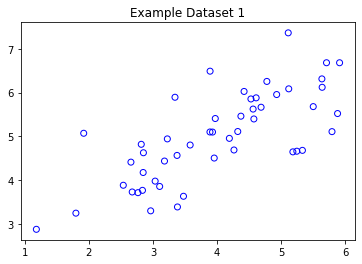

In [4]:
fig, ax1 = plt.subplots()
ax1.scatter(X[:, 0], X[:, 1], edgecolors='b', facecolors='none')
ax1.set_title('Example Dataset 1')

Implementing PCA

Normalizing the Data

In [5]:
def normalizer(X):
    n = X.shape[1]
    mean_list = []
    std_list = []
    for i in range(n):
        y = X[:, i][:, np.newaxis]
        mean = y.mean()
        std = y.std()
        y = (y-mean)/std
        X = np.hstack((X,y))
        mean_list.append(mean)
        std_list.append(std)
    return X[:, n:], mean_list, std_list

In [6]:
X_norm, mu, sigma = normalizer(X)

Covariance Matrix

In [7]:
cov_matrix = np.cov(X_norm.T)

In [8]:
cov_matrix.shape

(2, 2)

In [9]:
cov_matrix

array([[1.02040816, 0.7505412 ],
       [0.7505412 , 1.02040816]])

Singular Value Decomposition (SVD)

In [10]:
U, S, V = np.linalg.svd(cov_matrix)

In [11]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [12]:
S

array([1.77094936, 0.26986696])

Computed Eigen Vectors of the Dataset

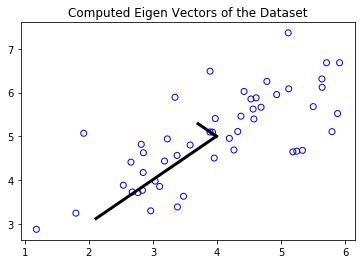

In [13]:
fig, ax2 = plt.subplots()
ax2.scatter(X[:, 0], X[:, 1], edgecolors='b', facecolors='none')
ax2.set_title('Computed Eigen Vectors of the Dataset')
ax2.plot([mu[0], (mu + 1.5*S[0]*U[:,0].T)[0]], [mu[1], (mu + 1.5*S[0]*U[:,0].T)[1]], color='black', linewidth=3)
ax2.plot([mu[0], (mu + 1.5*S[1]*U[:,1].T)[0]], [mu[1], (mu + 1.5*S[1]*U[:,1].T)[1]], color='black', linewidth=3)

Dimensionality Reduction

Plotting Normalized Data

Text(0.5, 1.0, 'Normalized Dataset Plot')

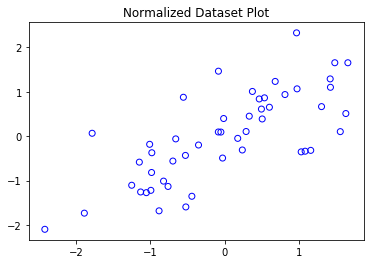

In [14]:
fig, ax3 = plt.subplots()
ax3.scatter(X_norm[:, 0], X_norm[:, 1], edgecolors='b', facecolors='none')
ax3.set_title('Normalized Dataset Plot')

Compressed Representation

In [15]:
def ProjectData(X_norm, U, K):
    U_reduced = U[:, :K]
    Z = U_reduced.T @ X_norm.T
    return Z.T

In [16]:
K = 1
Z = ProjectData(X_norm, U, K)

In [17]:
Z[0]

array([1.49631261])

Reconstruction from Compressed Representation

In [18]:
def RecoverData(Z, U, K):
    U_reduced = U[:, :K]
    X_approx = U_reduced @ Z.T
    return X_approx.T

In [19]:
X_rec = RecoverData(Z, U, K)

In [20]:
X_rec[0]

array([-1.05805279, -1.05805279])

Visualizing the Projections

Text(0.5, 1.0, 'Normalized and Projected Data after PCA')

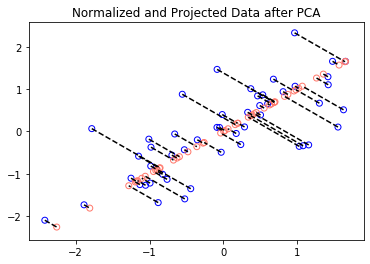

In [21]:
fig, ax4 = plt.subplots()
ax4.scatter(X_norm[:, 0], X_norm[:, 1], edgecolors='b', facecolors='none')
ax4.scatter(X_rec[:, 0], X_rec[:, 1], edgecolors='xkcd:salmon', facecolors='none')
for i in range(50):
    ax4.plot([X_norm[i,0], X_rec[i,0]], [X_norm[i,1], X_rec[i,1]], '--', color='black')
ax4.set_title('Normalized and Projected Data after PCA')

Faces Image Dataset

Loading the Dataset

In [22]:
mat2 = loadmat('ex7/ex7faces.mat')

In [23]:
X2 = mat2['X']

In [24]:
X2.shape

(5000, 1024)

Displaying the data randomly

In [25]:
import matplotlib.image as mpimg

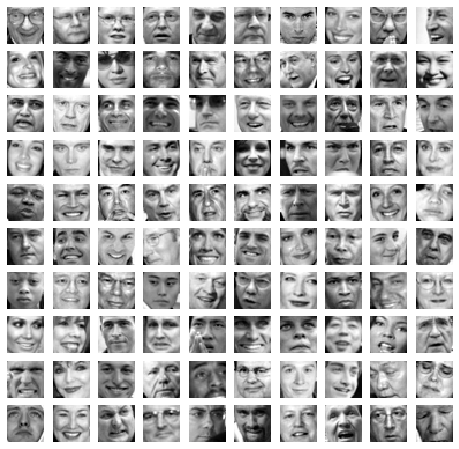

In [26]:
fig, ax5 = plt.subplots(10, 10, figsize=(8,8))
for i in range(10):
    for j in range(10):
        ax5[i,j].imshow(X2[j+i*10, :].reshape(32,32, order='F'), cmap='gray')
        ax5[i,j].axis('off')

Normalizing the Dataset

In [27]:
X2_norm, mu2, sigma2 = normalizer(X2)

In [28]:
X2_norm.shape

(5000, 1024)

Covariance Matrix

In [29]:
cov_matrix_X2 = np.cov(X2_norm.T)

In [30]:
cov_matrix_X2.shape

(1024, 1024)

Singular Value Decompostion

In [31]:
U2, S2, V2 = np.linalg.svd(cov_matrix_X2)

In [32]:
U2.shape

(1024, 1024)

Displaying the first 36 principal components that describe the 36 largest variations (K =36)

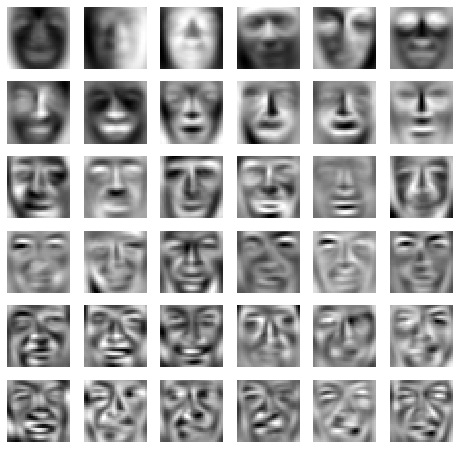

In [33]:
fig, ax6 = plt.subplots(6, 6, figsize=(8,8))
for i in range(6):
    for j in range(6):
        ax6[i,j].imshow(U2[:, j+i*10].reshape(32,32, order='F'), cmap='gray')
        ax6[i,j].axis('off')

Compressed Representation

In [34]:
K2 = 225
Z2 = ProjectData(X2_norm, U2, K2)

In [35]:
Z2.shape

(5000, 225)

Reconstruction from the Compressed Representation

In [36]:
X2_rec = RecoverData(Z2, U2, K2)

In [37]:
X2_rec.shape

(5000, 1024)

Visualizing Faces Reconstructed from the 225 Principal Components

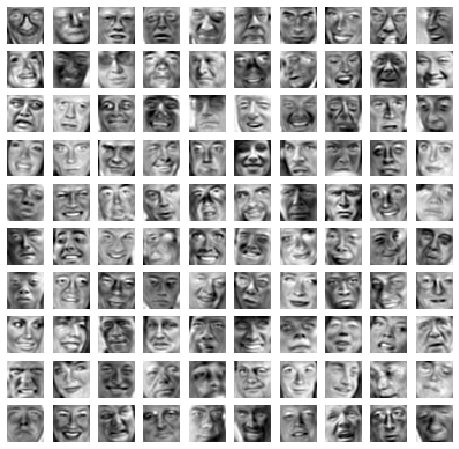

In [38]:
fig, ax7 = plt.subplots(10, 10, figsize=(8,8))
for i in range(10):
    for j in range(10):
        ax7[i,j].imshow(X2_rec[j+i*10, :].reshape(32,32, order='F'), cmap='gray')
        ax7[i,j].axis('off')

Variance Retention Calculation

First method
<br>
<br>
$ \large {\frac{ \frac{1}{m} \sum_{i=1}^{m} \mid\mid{x^{(i)} - x_{approx}^{(i)}}\mid\mid^2} { \frac{1}{m} \sum_{i=1}^{m} \mid\mid{x^{(i)}}\mid\mid^2} } \geq 0.97 $

In [45]:
(X2-X2_rec).std()/X2.std()

0.9799079941583816

Second Method (easier to use when testing for multiple values of K)

$ \large \frac{\sum_{i=1}^{k} S_{ii}}{\sum_{i=1}^{n} S_{ii}} \geq 0.97 $

In [58]:
np.sum(S2[:225])/np.sum(S2)

0.9779173875770647